<div style="border:solid green 2px; padding: 20px">

<b>Привет, Ксения! Поздравляю с выполнением очередного проекта!!</b>

Меня зовут Петр Раздобреев и я буду проверять твою работу. Попробую помочь сделать тебе её еще лучше! В Практикуме принято общени на ты, но если это дискомфортно, то сообщи об этом)

Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>☁️Так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>⛅️ Так выделены небольшие замечания.Такие замечания в проекте допустимы, это пространство для улучшений в будущем.
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️Так я выделяю успешные идеи.</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комменатри — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 
    

# Исследование данных сервиса аренды самокатов GoFast

Заказчик исследования - сервис GoFast, который предоставляет услуги краткосрочной аренды самокатов через мобильное приложение. Приложением можно пользоваться без подписки и сней, разница в тарифах:  
без подписки:  
- абонентская плата отсутствует;  
- стоимость одной минуты поездки — 8 рублей;  
- стоимость старта (начала поездки) — 50 рублей; 

с подпиской Ultra:  
- абонентская плата — 199 рублей в месяц;  
- стоимость одной минуты поездки — 6 рублей;  
- стоимость старта — бесплатно.  

Есть данные данные о некоторых пользователях из нескольких городов, а также об их поездках. Описание данных:  

**Пользователи — users_go.csv**  
- user_id - уникальный идентификатор пользователя
- name - имя пользователя
- age - возраст
- city - город
- subscription_type - тип подписки (free, ultra)  

**Поездки — rides_go.csv**  
- user_id - уникальный идентификатор пользователя
- distance - расстояние, которое пользователь проехал в текущей сессии (в метрах)
- duration - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
- date - дата совершения поездки  

**Подписки — subscriptions_go.csv**  
- subscription_type - тип подписки
- minute_price - стоимость одной минуты поездки по данной подписке
- start_ride_price - стоимость начала поездки
- subscription_fee - стоимость ежемесячного платежа  

Нужно проанализировать данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.

Импортируем необходимые для работы библиотеки:

In [1]:
from scipy import stats as st
from scipy.stats import binom, poisson

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Задаём настройки отображения:

In [2]:
pd.set_option('display.float_format', '{:,.2f}'.format)

#### Шаг 1. Загрузка данных

Считаем доступные данные из трёх источников:

In [3]:
# загружаем данные из файла в dataframe
try:
    users_data = pd.read_csv('../datasets/users_go.csv')
    rides_data = pd.read_csv('../datasets/rides_go.csv')
    subscriptions_data = pd.read_csv('../datasets/subscriptions_go.csv')
except:
    users_data = pd.read_csv('/datasets/users_go.csv')
    rides_data = pd.read_csv('/datasets/rides_go.csv')
    subscriptions_data = pd.read_csv('/datasets/subscriptions_go.csv')

# Чтобы смотреть все столбцы
pd.set_option('display.max_columns', None)

Изучим df users_data:

In [4]:
display(users_data.info())
users_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


None

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Для вывода `info` дополнительно необязательно писать `display`


1565 клиентов у сервиса, типы данных корректные, менять что-то не потребуется, но на этапе предобработки нужно будет проверить, что города названы в едином стиле (исключить случаи вроде 'Москва' и 'москва', опечатки и т.п.)

Изучим df rides_data:

In [5]:
display(rides_data.info())
rides_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


None

,user_id,distance,duration,date
0,1,"4,409.92",25.60,2021-01-01
1,1,"2,617.59",15.82,2021-01-18
2,1,754.16,6.23,2021-04-20
3,1,"2,694.78",18.51,2021-08-11
4,1,"4,028.69",26.27,2021-08-28


Наши полторы тысячи клиентов совершили 18 с хвостиком тысяч поездок, не плохо. Точно поправим тип данных для date, со строкой работать не удобно, в остальном типы подходящие.

Изучим df subscriptions_data:

In [6]:
display(subscriptions_data.info())
subscriptions_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


None

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


Лучший df из имеющихся, справочник из двух записей, описывающих тарифы, все типы корректные.

**Вывод по шагу 1:**  
На момент исследования у GoFast 1,5 тысячи клиентов, совершивших ~18 тысяч поездок и два возможных тарифа. Кроме того, ни в одной выборке нет пропущенных значений у фич. Далее переходим к предобработке данных, в конце следующего этапа число валидных клиентов и поездок может сократиться.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Замечательно, что знакомишься с датафреймом выводя и несколько первых строк и обзорную информацию при помощи `info`

#### Шаг 2. Предобработка данных

subscriptions_data в этом этапе не обрабатывается, т.к. он полностью просматриваем и корректен.  

Начнём с приведения типов. В rides_data фичу date преобразуем (object -> datetime)

In [7]:
rides_data['date'] = pd.to_datetime(rides_data['date'], format='%Y-%m-%d') # 2021-08-28
rides_data['date'].head()

0   2021-01-01
1   2021-01-18
2   2021-04-20
3   2021-08-11
4   2021-08-28
Name: date, dtype: datetime64[ns]

Для удобства построения графиков из даты выделим её составляющие (кроме номера дня месяца, он будет не очень информативен). Посмотрим, какие годы есть в выборке:

In [8]:
rides_data['date'].dt.year.value_counts()

2021    18068
Name: date, dtype: int64

Всего один вариант, нет смысла его выделять. Рассмотрим месяцы:

In [9]:
rides_data['date'].dt.month.value_counts()

1     1585
5     1560
6     1553
3     1544
7     1529
12    1527
8     1518
9     1517
4     1506
10    1475
11    1418
2     1336
Name: date, dtype: int64

Все 12 месяцев на месте. Похоже, только февраль выдался не самым приятным для катания на самокатах и всё же.

In [10]:
rides_data['month'] = rides_data['date'].dt.month
rides_data.head()

,user_id,distance,duration,date,month
0,1,"4,409.92",25.60,2021-01-01,1
1,1,"2,617.59",15.82,2021-01-18,1
2,1,754.16,6.23,2021-04-20,4
3,1,"2,694.78",18.51,2021-08-11,8
4,1,"4,028.69",26.27,2021-08-28,8


Красота. Дальше переходим к обработке пропусков. Т.к. в шаге 1 мы выяснили, что явных пропусков нет, попробуем найти нулевые значения, или отрицательные, или пустые строки. Начнём с users_data:

In [11]:
display(sorted(users_data['subscription_type'].unique())) # Всё корректно
display(sorted(users_data['name'].unique())) # Всё корректно
display(sorted(users_data['age'].unique())) # Всё корректно
display(sorted(users_data['city'].unique())) # Всё корректно

['free', 'ultra']

['Агата',
 'Аделина',
 'Адель',
 'Айдар',
 'Александр',
 'Александра',
 'Алексей',
 'Алина',
 'Алиса',
 'Алия',
 'Алла',
 'Альберт',
 'Альбина',
 'Алёна',
 'Амалия',
 'Амина',
 'Амир',
 'Анастасия',
 'Анатолий',
 'Ангелина',
 'Андрей',
 'Анжелика',
 'Анна',
 'Антон',
 'Антонина',
 'Ариана',
 'Арина',
 'Арсен',
 'Арсений',
 'Артемий',
 'Артур',
 'Артём',
 'Богдан',
 'Борис',
 'Вадим',
 'Валентина',
 'Валерий',
 'Валерия',
 'Варвара',
 'Василий',
 'Василина',
 'Василиса',
 'Вера',
 'Вероника',
 'Виктор',
 'Виктория',
 'Виолетта',
 'Виталий',
 'Виталина',
 'Влад',
 'Влада',
 'Владимир',
 'Владислав',
 'Владислава',
 'Всеволод',
 'Вячеслав',
 'Галина',
 'Георгий',
 'Герман',
 'Глеб',
 'Гордей',
 'Григорий',
 'Давид',
 'Дамир',
 'Даниил',
 'Данил',
 'Данила',
 'Даниэль',
 'Дарина',
 'Дарья',
 'Демид',
 'Денис',
 'Диана',
 'Дмитрий',
 'Ева',
 'Евгений',
 'Евгения',
 'Егор',
 'Екатерина',
 'Елена',
 'Елизавета',
 'Елисей',
 'Есения',
 'Жанна',
 'Зарина',
 'Захар',
 'Злата',
 'Иван',
 'Игнат',

[12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 43]

['Екатеринбург',
 'Краснодар',
 'Москва',
 'Омск',
 'Пятигорск',
 'Ростов-на-Дону',
 'Сочи',
 'Тюмень']

В users_data нет пропущенных не корректных значений.  

Теперь перейдём к rides_data:

In [12]:
display(rides_data.loc[rides_data['distance'] <= 0, 'distance']) # Корректно
display(rides_data.loc[rides_data['duration'] <= 0, 'duration']) # Корректно

Series([], Name: distance, dtype: float64)

Series([], Name: duration, dtype: float64)

В rides_data тоже нет значений, которые можно было бы считать пропущенными.  

Теперь перейдём к поиску возможных явных дубликатов. Не явные дубликаты не буду рассматривать, т.к. они могли быть только у users_data, и я отсмотрела их в 10 ячейке. Начнём с users_data:

In [13]:
display(f'Кол-во явных дубликатов до обработки: {users_data.duplicated().sum()}')
users_data = users_data.drop_duplicates().reset_index(drop=True)
display(f'Кол-во явных дубликатов после обработки: {users_data.duplicated().sum()}')

'Кол-во явных дубликатов до обработки: 31'

'Кол-во явных дубликатов после обработки: 0'

Теперь перейдём к rides_data:

In [14]:
display(f'Кол-во явных дубликатов до обработки: {rides_data.duplicated().sum()}')
rides_data = rides_data.drop_duplicates().reset_index(drop=True)
display(f'Кол-во явных дубликатов после обработки: {rides_data.duplicated().sum()}')

'Кол-во явных дубликатов до обработки: 0'

'Кол-во явных дубликатов после обработки: 0'

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
И про дубликаты не забываешь, замечательно. Но действия по первичному анализу датафреймов схожи, можно было бы функцию написать 

Вопрос с дубликатами решён, в users_data был убран 31 дубликат, в rides_data их не было.

**Вывод по шагу 2:**  
Изменили тип данных для date в users_data (object -> datetime), добавили столбец month в users_data. Проверили users_data и rides_data на пропуски и дубликаты.

Итого, новый размер df-ов:  
- rides_data: 18068 -> 18068 (без изменений)
- users_data: 1565 -> 1534 (минус 31 запись, это 1.9% от изначального users_data)

#### Шаг 3. Исследовательский анализ данных

Опишем и визуализируем общую информацию о пользователях и поездках.

##### Частота встречаемости городов

Посмотрим, в каких городах какое кол-во клиентов:

,cities_count
city,
Екатеринбург,204
Краснодар,193
Москва,168
Омск,183
Пятигорск,219
Ростов-на-Дону,198
Сочи,189
Тюмень,180


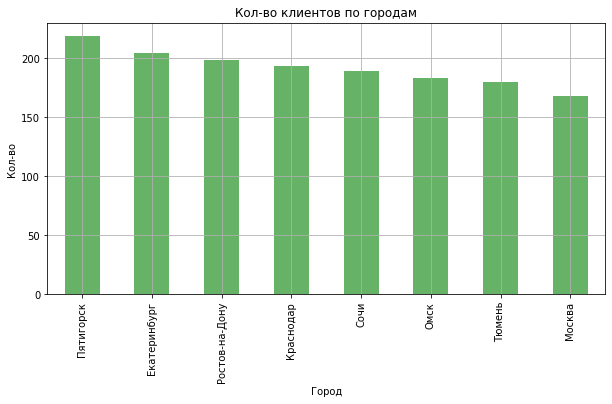

In [15]:
pivot_users_data = users_data.pivot_table(index='city', values='user_id', aggfunc=['count'])
pivot_users_data = pivot_users_data.set_axis(['cities_count'], axis='columns')

display(pivot_users_data)

(
    pivot_users_data
    .sort_values(by='cities_count', ascending=False)
    .plot(y='cities_count', kind='bar', figsize=(10, 5), legend=False, grid=True, color='green', alpha=0.6)
)
plt.title('Кол-во клиентов по городам')
plt.ylabel('Кол-во')
plt.xlabel('Город')
plt.show()

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Подписи осей, сортировка значений на графике, отлично!

Всего 8 возможных городов, кол-во клиентов от 219 (Пятигорск) до 168 (Москва). Разница между этими минимумом и максимумом ~ 23%. Похоже, Московская конкуренция выше, чем у остальных городов.

##### Соотношение пользователей с подпиской и без подписки

Так как глобально у нас клиенты могут быть двух категорий (по типу тарифа), интересно посмотреть на их соотношение:

count                                                 \
city              Екатеринбург Краснодар Москва Омск Пятигорск Ростов-на-Дону   
subscription_type                                                               
free                       112       112     84   92       125            109   
ultra                       92        81     84   91        94             89   

                               
city              Сочи Тюмень  
subscription_type              
free               103     98  
ultra               86     82

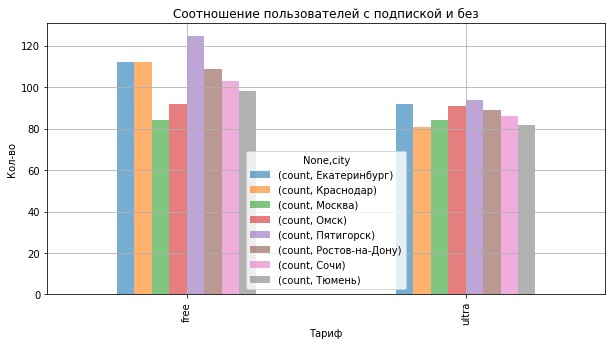

'Доля пользователей с подпиской: 46%'

'Доля пользователей без подписки: 54%'

In [16]:
pivot_users_data = users_data.pivot_table(index='subscription_type', columns=['city'], values='user_id', aggfunc=['count'])
display(pivot_users_data)

(
    pivot_users_data
    .plot( kind='bar', figsize=(10, 5), legend=True, grid=True, alpha=0.6)
)
plt.title('Соотношение пользователей с подпиской и без')
plt.ylabel('Кол-во')
plt.xlabel('Тариф')
plt.show()

pivot_users_data = users_data.pivot_table(index='subscription_type', values='user_id', aggfunc=['count'])
pivot_users_data = pivot_users_data.set_axis(['subscription_types_count'], axis='columns')

full_count = pivot_users_data['subscription_types_count'][0] + pivot_users_data['subscription_types_count'][1]
ultra_sub = pivot_users_data['subscription_types_count'][1] / full_count
free_sub = pivot_users_data['subscription_types_count'][0] / full_count

display(f"Доля пользователей с подпиской: {round((ultra_sub * 100))}%")
display(f"Доля пользователей без подписки: {round((free_sub * 100))}%")

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Спасибо за агрегированные сведения выше

Приблизительно пополам, пользователей без подписки больше. Значит ли это, что у нас почти половина клиентов пользуются сервисом так редко, что бесплатный тариф им выгоднее.

##### Возраст пользователей

Какая возрастная категория в нашем сервисе самая популярная:

,ages_count
age,
12,4
13,8
14,9
15,13
16,19
17,26
18,46
19,47
20,71


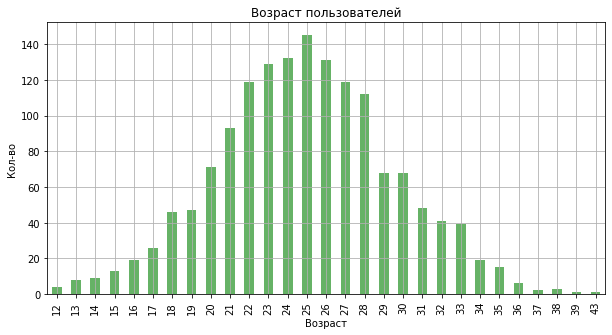

In [17]:
pivot_users_data = users_data.pivot_table(index='age', values='user_id', aggfunc=['count'])
pivot_users_data = pivot_users_data.set_axis(['ages_count'], axis='columns')

display(pivot_users_data)

(
    pivot_users_data
    .sort_values(by='age', ascending=True)
    .plot(y='ages_count', kind='bar', figsize=(10, 5), legend=False, grid=True, color='green', alpha=0.6)
)
plt.title('Возраст пользователей')
plt.ylabel('Кол-во')
plt.xlabel('Возраст')
plt.show()

In [18]:
display(f"Возраст клиентов средний: {round(users_data['age'].mean(), 1)}, медианный: {users_data['age'].median()}")

'Возраст клиентов средний: 24.9, медианный: 25.0'

Примерно от 20 до 30 лет - самая большая доля клиентов. Клиентам младше и старше, видимо, интереснее другие виды передвижения.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Спасибо за акцент на наличии и более юных пользователях, возможно финансово не у всех школьников есть деньги) 

##### Расстояние, которое пользователь преодолел за одну поездку

Оценим расстояние, которое пользователи преодолевают за одну поездку. Посмотрим ~~в разрезе месяцев на среднее и медианное значения~~ на распределение:

In [19]:
rides_data.head()

,user_id,distance,duration,date,month
0,1,"4,409.92",25.60,2021-01-01,1
1,1,"2,617.59",15.82,2021-01-18,1
2,1,754.16,6.23,2021-04-20,4
3,1,"2,694.78",18.51,2021-08-11,8
4,1,"4,028.69",26.27,2021-08-28,8


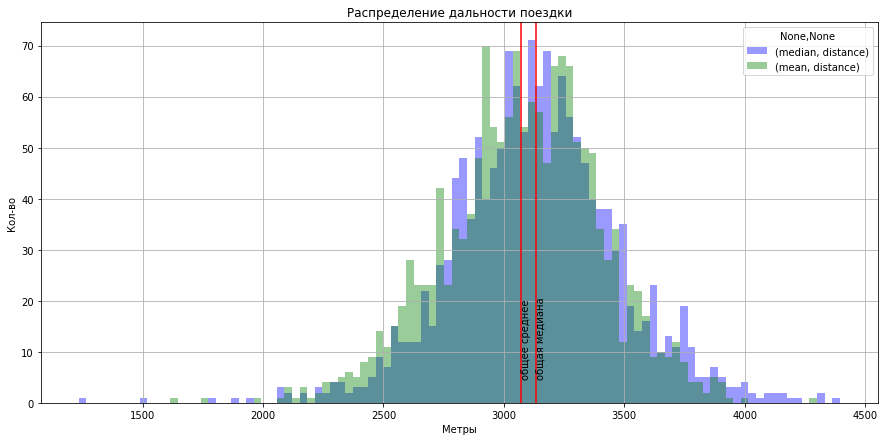

'Общая медиана: 3133.61 м, общее среднее: 3070.66 м'

In [20]:
# V1
# pivot_rides_data = rides_data.pivot_table(index='month', values='distance', aggfunc=['mean', 'median'])
# pivot_rides_data = pivot_rides_data.set_axis(['mean_distance', 'median_distance'], axis='columns')

# display(pivot_rides_data)

# (
#     pivot_rides_data
#     .sort_values(by='month', ascending=True)
#     .plot( kind='bar', figsize=(10, 5), legend=False, grid=True, alpha=0.6)
# )
# plt.title('Среднее и медианное расстояние за поездку по месяцам')
# plt.ylabel('Метры')
# plt.xlabel('Месяц')
# plt.show()

# V2
(
    rides_data
    .pivot_table(index='user_id', values='distance', aggfunc=['median', 'mean'])
    .plot(kind='hist', bins=100, figsize=(15, 7), grid=True, alpha=0.4, color=['blue', 'green'])
)
plt.axvline(x=round(rides_data['distance'].median(), 2), color='r')
plt.text(round(rides_data['distance'].median(), 2), 5, 'общая медиана', rotation=90)
plt.axvline(x=round(rides_data['distance'].mean(), 2), color='r')
plt.text(round(rides_data['distance'].mean(), 2), 5, 'общее среднее', rotation=90)

plt.title('Распределение дальности поездки')
plt.ylabel('Кол-во')
plt.xlabel('Метры')
plt.show()

display(f"Общая медиана: {round(rides_data['distance'].median(), 2)} м, общее среднее: {round(rides_data['distance'].mean(), 2)} м")

V1: ~~Практически равномерное распределение. При этом между средним и медианным нет большой разницы, а значит, нет и кучи аномалий в данных, это хорошо. Если не смотреть на разрезы, то в среднем самокат за поездку проезжает чуть больше 3 км.~~

V2:  Распределение похоже на нормальное, медиана и среднее близко друг к другу, значит, больших выбросов нет. Судя по распределению, пользователи арендуют самокат чуть больше, чем на 3 км.

##### Продолжительность поездок

Оценим время, которое пользователи проводят за рулём за одну поездку. Посмотрим в разрезе месяцев на среднее и медианное значения:

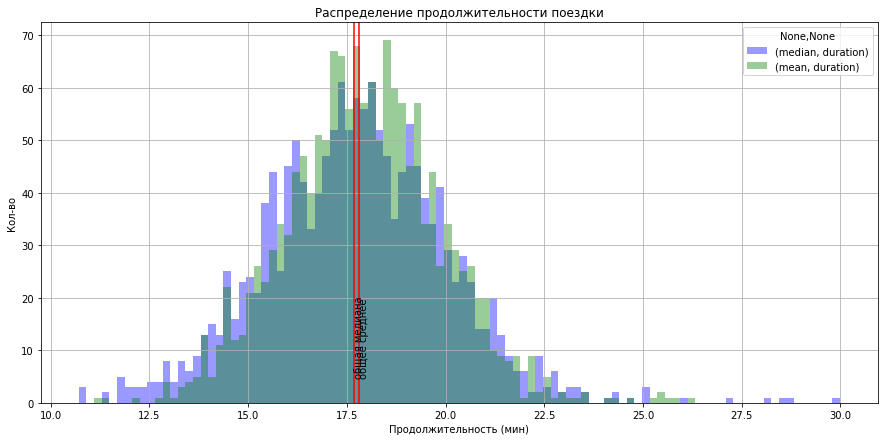

'Общая медиана: 17.68 мин, общее среднее: 17.81 мин'

In [21]:
# V1
# pivot_rides_data = rides_data.pivot_table(index='month', values='duration', aggfunc=['mean', 'median'])
# pivot_rides_data = pivot_rides_data.set_axis(['mean_duration', 'median_duratione'], axis='columns')

# display(pivot_rides_data)

# (
#     pivot_rides_data
#     .sort_values(by='month', ascending=True)
#     .plot( kind='bar', figsize=(10, 5), legend=False, grid=True, alpha=0.6)
# )
# plt.title('Среднее и медианное время поездки по месяцам')
# plt.ylabel('Продолжительность (мин)')
# plt.xlabel('Месяц')
# plt.show()

# V2
(
    rides_data
    .pivot_table(index='user_id', values='duration', aggfunc=['median', 'mean'])
    .plot(kind='hist', bins=100, figsize=(15, 7), grid=True, alpha=0.4, color=['blue', 'green'])
)
plt.axvline(x=round(rides_data['duration'].median(), 2), color='r')
plt.text(round(rides_data['duration'].median(), 2), 5, 'общая медиана', rotation=90)
plt.axvline(x=round(rides_data['duration'].mean(), 2), color='r')
plt.text(round(rides_data['duration'].mean(), 2), 5, 'общее среднее', rotation=90)

plt.title('Распределение продолжительности поездки')
plt.ylabel('Кол-во')
plt.xlabel('Продолжительность (мин)')
plt.show()

display(f"Общая медиана: {round(rides_data['duration'].median(), 2)} мин, общее среднее: {round(rides_data['duration'].mean(), 2)} мин")

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>☁️

Для дистанций и времени всё же ожидалось построение графиков распределений
</div>  

<div class="alert alert-info"> <b>Комментарий студента:</b> Внесла исправления, старые варианты оставила закомментированными/зачёркнутыми с пометкой V1, новые под пометкой V2</div>


<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
   
Отлично! Спасибо и за добавление линий средних

</div>

V1: ~~Снова практически равномерное распределение. Серьёзной разницы между средним и медианным значением опять нет, аномалий не ждём. Если не смотреть на разрезы, то в среднем самокат арендуют почти на 18 минут.~~  

V2:  Распределение похоже на нормальное, медиана и среднее близко друг к другу, значит, больших выбросов нет. Судя по распределению, пользователи арендуют самокат почти на 18 мин.

**Вывод по шагу 3:**  
  
По клиентам:  
На этом этапе мы выяснили, что GoFast предоставляет аренду самокатов в 8 городах. Самый активный по кол-ву клиентов - Пятигорск (219 человек), наименее активный - Москва (168 человек), между ними разрыв ~23%. Если смотреть по всем городам, то доля клиентов с подпиской 46%, почти половина. От города к городу соотношение немного меняется, но средняя картина сохраняется, только в Москве и Омске клиентов с подпиской немного больше, чем без. Возможно, стоит проверить гипотезу о том, что почти половина клиентов "редкие" и им выгоднее не платить за подписку. Средний возраст клиентов от 20 до 30 лет, средний: 24.9, медианный: 25.0.  

V1:  
~~По поездкам:  
Практически равномерное распределение по месяцам наблюдается как в дальности, так и в продолжительности поездок. В среднем самокат за поездку проезжает чуть больше 3 км и делает он это почти за 18 минут.~~  

V2:  
По поездкам:  
Распределения похожи на нормальные, медианы и средние близко друг к другу, значит, больших выбросов нет. Судя по распределению, пользователи арендуют самокат чуть больше, чем на 3 км и по длительности почти на 18 минут.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Нравится наличие промежуточных выводов

#### Шаг 4. Объединение данных

Объединим users_data, rides_data и subscriptions_data в один df, назовём full_data:

In [22]:
# добавим каждому пользователю подробную информацию о его тарифе
users_and_subscriptions_data = (
    users_data
    .merge(
        subscriptions_data,
        how='left'
    )
)
# проверяем корректность
display(users_and_subscriptions_data.query("subscription_type =='free'").head())
display(users_and_subscriptions_data.query("subscription_type =='ultra'").head())

,user_id,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
699,700,Айдар,22,Омск,free,8,50,0
700,701,Иван,31,Екатеринбург,free,8,50,0
701,702,Мирослава,20,Екатеринбург,free,8,50,0
702,703,Иван,30,Пятигорск,free,8,50,0
703,704,Мирон,29,Ростов-на-Дону,free,8,50,0


,user_id,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,6,0,199
1,2,Станислав,31,Омск,ultra,6,0,199
2,3,Алексей,20,Москва,ultra,6,0,199
3,4,Константин,26,Ростов-на-Дону,ultra,6,0,199
4,5,Адель,28,Омск,ultra,6,0,199


In [23]:
# к каждой записи о поездке добавляем полную информацию о пользователе, который её совершил
full_data = (
    users_and_subscriptions_data
    .merge(
        rides_data,
        how='right'
    )
)
# проверяем корректность
full_data.head()

,user_id,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee,distance,duration,date,month
0,1,Кира,22,Тюмень,ultra,6,0,199,"4,409.92",25.60,2021-01-01,1
1,1,Кира,22,Тюмень,ultra,6,0,199,"2,617.59",15.82,2021-01-18,1
2,1,Кира,22,Тюмень,ultra,6,0,199,754.16,6.23,2021-04-20,4
3,1,Кира,22,Тюмень,ultra,6,0,199,"2,694.78",18.51,2021-08-11,8
4,1,Кира,22,Тюмень,ultra,6,0,199,"4,028.69",26.27,2021-08-28,8


Теперь у нас df full_data содержит полный набор данных по каждой поездке, пользователю, который её совершил и его тарифном плане.

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>☁️

Прошу ещё добавить проверку, что после соединения таблиц не возникли пропуски, что размер объъединенной таблице соответствует ожиданиям

</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Добавила проверку под этим комментарием</div>
 
<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
   

Спасибо, пару проектов ещё прошу попроверять, затем ревьюеры будут лояльнее к проверкам
</div>

Ожидается, что кол-во записей после объединения таблиц будет = 18068, т.к. именно столько было после предобработки у df rides_data на втором шаге, а объединение строится на том, что к данным этого df добавляются данные от двух других df:

In [24]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   minute_price       18068 non-null  int64         
 6   start_ride_price   18068 non-null  int64         
 7   subscription_fee   18068 non-null  int64         
 8   distance           18068 non-null  float64       
 9   duration           18068 non-null  float64       
 10  date               18068 non-null  datetime64[ns]
 11  month              18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.8+ MB


Полученное кол-во записей после объединения соответствует ожидаемому, порядок.

На основе full_data выделим два df:  
- c данными о пользователях без подписки (free_data)
- с данными о пользователях с подпиской (ultra_data)

In [25]:
free_data = full_data.query("subscription_type =='free'")
display(free_data.head())

,user_id,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee,distance,duration,date,month
6500,700,Айдар,22,Омск,free,8,50,0,"2,515.69",14.94,2021-01-02,1
6501,700,Айдар,22,Омск,free,8,50,0,846.93,16.23,2021-02-01,2
6502,700,Айдар,22,Омск,free,8,50,0,"4,004.43",20.02,2021-02-04,2
6503,700,Айдар,22,Омск,free,8,50,0,"1,205.91",9.78,2021-02-10,2
6504,700,Айдар,22,Омск,free,8,50,0,"3,047.38",17.43,2021-02-14,2


In [26]:
ultra_data = full_data.query("subscription_type =='ultra'")
display(ultra_data.head())

,user_id,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee,distance,duration,date,month
0,1,Кира,22,Тюмень,ultra,6,0,199,"4,409.92",25.60,2021-01-01,1
1,1,Кира,22,Тюмень,ultra,6,0,199,"2,617.59",15.82,2021-01-18,1
2,1,Кира,22,Тюмень,ultra,6,0,199,754.16,6.23,2021-04-20,4
3,1,Кира,22,Тюмень,ultra,6,0,199,"2,694.78",18.51,2021-08-11,8
4,1,Кира,22,Тюмень,ultra,6,0,199,"4,028.69",26.27,2021-08-28,8


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
В последней строке будет выведена переменная даже если просто вызвать её, без `print`, `display`

А теперь подробнее посмотрим информацию о расстоянии и времени поездок для пользователей обеих категорий раздельно.

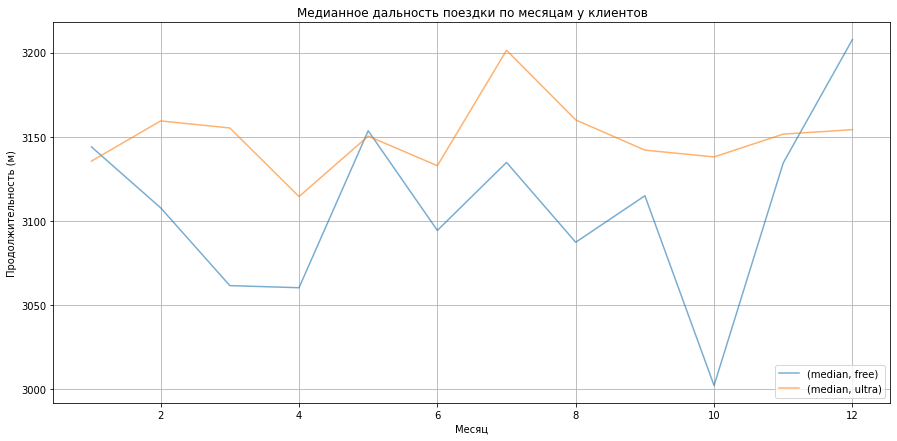

In [27]:
(
    full_data
    .pivot_table(index='month', columns='subscription_type', values='distance', aggfunc=['median'])
    .plot(kind='line', figsize=(15, 7), legend=True, grid=True, alpha=0.6)
)
plt.title('Медианное дальность поездки по месяцам у клиентов')
plt.ylabel('Продолжительность (м)')
plt.xlabel('Месяц')
plt.legend(loc = 'lower right')
plt.show()

In [28]:
pivot_free_data = free_data.pivot_table(index='month', values='distance', aggfunc=['mean', 'median'])
pivot_free_data = pivot_free_data.set_axis(['mean_duration', 'median_duratione'], axis='columns')

pivot_ultra_data = ultra_data.pivot_table(index='month', values='distance', aggfunc=['mean', 'median'])
pivot_ultra_data = pivot_ultra_data.set_axis(['mean_duration', 'median_duratione'], axis='columns')

display(pivot_free_data, pivot_ultra_data)

display(f"Без разреза free, среднее: {round(free_data['distance'].mean(), 2)} м, медианное: {round(free_data['distance'].median(), 2)} м")
display(f"Без разреза ultra, среднее: {round(ultra_data['distance'].mean(), 2)} м, медианное: {round(ultra_data['distance'].median(), 2)} м")

,mean_duration,median_duratione
month,,
1,"3,097.14","3,143.86"
2,"3,024.26","3,107.62"
3,"2,994.99","3,061.36"
4,"3,005.60","3,060.11"
5,"3,111.05","3,153.49"
6,"3,075.58","3,094.20"
7,"3,061.25","3,134.65"
8,"2,990.11","3,087.16"
9,"3,049.33","3,114.83"


,mean_duration,median_duratione
month,,
1,"3,077.32","3,135.45"
2,"3,100.77","3,159.34"
3,"3,128.24","3,155.14"
4,"3,111.74","3,114.32"
5,"3,125.53","3,150.30"
6,"3,117.32","3,132.68"
7,"3,151.00","3,201.38"
8,"3,120.93","3,159.94"
9,"3,081.55","3,141.97"


'Без разреза free, среднее: 3045.5 м, медианное: 3114.65 м'

'Без разреза ultra, среднее: 3115.45 м, медианное: 3148.64 м'

На графике отлично видно, что только в январе и марте у "free пользователей" поездки немного длиннее, в декабре чуть более существенно. В остальном, "ultra пользователи" арендуют самокаты на большие расстояния. Если смотреть без разрезова по месяцам, то разница между дальностью поездок у двух категорий пользователей ~1%, это достаточно мало, поэтому можем сказать, что все пользователи арендую самокат примерно на 3 км с хвостиком.

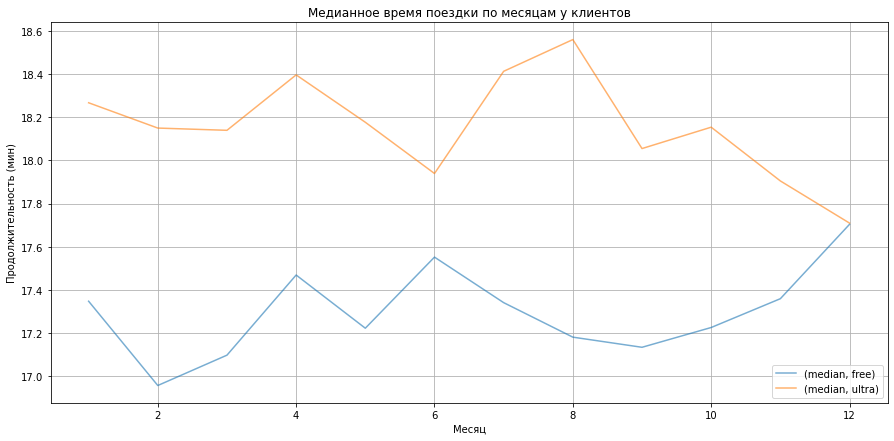

In [29]:
(
    full_data
    .pivot_table(index='month', columns='subscription_type', values='duration', aggfunc=[ 'median'])
    .plot(kind='line', figsize=(15, 7), legend=True, grid=True, alpha=0.6)
)
plt.title('Медианное время поездки по месяцам у клиентов')
plt.ylabel('Продолжительность (мин)')
plt.xlabel('Месяц')
plt.legend(loc = 'lower right')
plt.show()

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>☁️

Также ожидалось сравнение распределений по тарифам дистанций, времени поездок
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Добавила сравнение немного ниже, отметила тегом V2</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
   

Отлично
</div>

In [30]:
pivot_free_data = free_data.pivot_table(index='month', values='duration', aggfunc=['mean', 'median'])
pivot_free_data = pivot_free_data.set_axis(['mean_duration', 'median_duratione'], axis='columns')

pivot_ultra_data = ultra_data.pivot_table(index='month', values='duration', aggfunc=['mean', 'median'])
pivot_ultra_data = pivot_ultra_data.set_axis(['mean_duration', 'median_duratione'], axis='columns')

display(pivot_free_data, pivot_ultra_data)

display(f"Без разреза free, среднее: {round(free_data['duration'].mean(), 2)} мин, медианное: {round(free_data['duration'].median(), 2)} мин")
display(f"Без разреза ultra, среднее: {round(ultra_data['duration'].mean(), 2)} мин, медианное: {round(ultra_data['duration'].median(), 2)} мин")

,mean_duration,median_duratione
month,,
1,17.46,17.35
2,17.15,16.96
3,17.07,17.10
4,17.54,17.47
5,17.64,17.22
6,17.55,17.55
7,17.49,17.34
8,17.15,17.18
9,17.42,17.13


,mean_duration,median_duratione
month,,
1,18.49,18.27
2,18.77,18.15
3,18.45,18.14
4,18.54,18.40
5,18.67,18.18
6,18.58,17.94
7,18.62,18.41
8,18.67,18.56
9,18.50,18.05


'Без разреза free, среднее: 17.39 мин, медианное: 17.33 мин'

'Без разреза ultra, среднее: 18.54 мин, медианное: 18.18 мин'

Картина похожа на аналогичную с дальностью поездки. В основном, "ultra пользователи" арендуют самокаты на большее время, чем "free пользователи". Только в декабре значения отличаются на 0,005654 мин, это очень мало, пренебрежём и будем считать, что в декабре время поездки "ultra и free пользователей" одинаково. Если без разрезов по месяцам, то "ultra пользователи" катаются на пол минуты дольше, это отличие в ~5%, оно мало, но всё же можно сказать, что время аренды немного больше.

V2:  Посмотрим ещё на распределения:

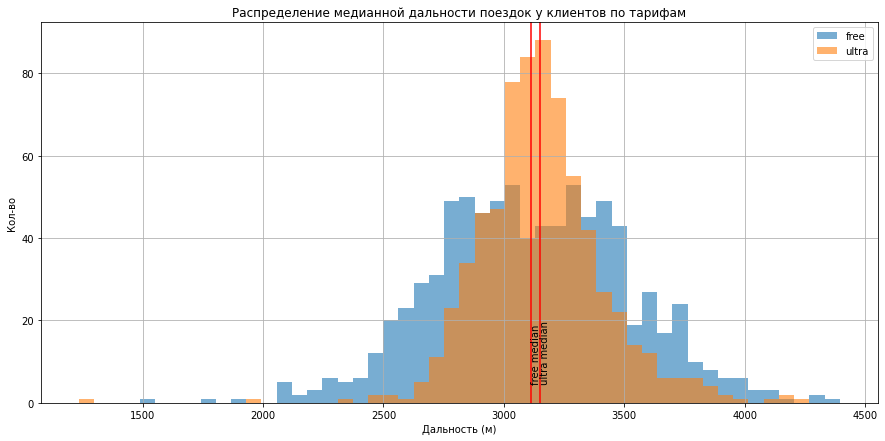

In [31]:
# V2 сравнение распределений по тарифам дистанций поездок
(
    full_data
    .pivot_table(index='user_id', columns='subscription_type', values='distance', aggfunc='median')
    .plot(kind='hist', bins=50, figsize=(15, 7), legend=True, grid=True, alpha=0.6)
)
plt.title('Распределение медианной дальности поездок у клиентов по тарифам')
plt.ylabel('Кол-во')
plt.xlabel('Дальность (м)')
plt.legend(loc = 'upper right')

free_median = round(full_data.query("subscription_type == 'free'")['distance'].median(), 2)
ultra_median = round(full_data.query("subscription_type == 'ultra'")['distance'].median(), 2)
plt.axvline(x=free_median, color='r')
plt.text(free_median, 5, 'free median', rotation=90)
plt.axvline(x=ultra_median, color='r')
plt.text(ultra_median, 5, 'ultra median', rotation=90)

plt.show()

V2:  Клиенты с подпиской чаще всего совершают поездки, близкие к медиане их сегмента, тогда как пользователи без подписки сильнее разбросаны от своей медианы, у них больше поездок, которые по дальности больше и меньше, чем клиентов с подпиской.

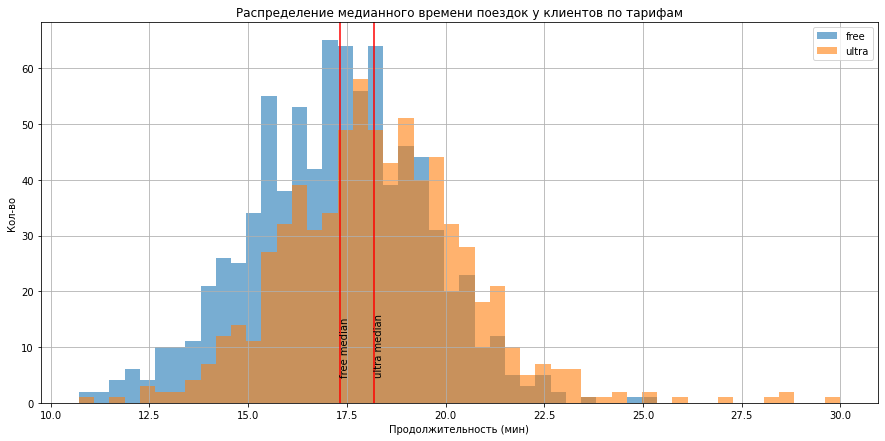

In [32]:
# V2 сравнение распределений по тарифам времени поездок
(
    full_data
    .pivot_table(index='user_id', columns='subscription_type', values='duration', aggfunc='median')
    .plot(kind='hist', bins=50, figsize=(15, 7), legend=True, grid=True, alpha=0.6)
)
plt.title('Распределение медианного времени поездок у клиентов по тарифам')
plt.ylabel('Кол-во')
plt.xlabel('Продолжительность (мин)')
plt.legend(loc = 'upper right')

free_median = round(full_data.query("subscription_type == 'free'")['duration'].median(), 2)
ultra_median = round(full_data.query("subscription_type == 'ultra'")['duration'].median(), 2)
plt.axvline(x=free_median, color='r')
plt.text(free_median, 5, 'free median', rotation=90)
plt.axvline(x=ultra_median, color='r')
plt.text(ultra_median, 5, 'ultra median', rotation=90)

plt.show()

V2:  Если в случае с дальностью поездки, free клиенты "окружили" ultra клиентов, то тут медиана ultra клиентов на секунды впереди медианы free клиентов, т.е. ultra клиенты чаще совершают более продолжительные поездки.

**Вывод по шагу 4:**  
Объединили df-ы, теперь у нас df full_data содержит полный набор данных по каждой поездке, пользователю, который её совершил и его тарифном плане. При дальнейшем исследовании он будет являться "базовым".

На основе full_data посмотрели в разрезе типов тарифов клиентов на дальность и продолжительность поездок, итоговая сводка выглядит так:
- Все пользователи арендую самокат примерно на 3 км, разница между дальностью поездок у двух категорий пользователей ~1%
- "Ultra пользователи" катаются на пол минуты дольше (~18 мин), "free пользователи" ~17.5 мин, это отличие в ~5%

V2:  
Заключение о просмотре распределений:  
- Клиенты с подпиской чаще всего совершают поездки, близкие к медиане их сегмента, график распределения имеет чёткий пик, тогда как пользователи без подписки сильнее разбросаны от своей медианы, этот пик более пологий, у них больше поездок, которые по дальности больше и меньше, чем клиентов с подпиской.  
- Если в случае с дальностью поездки, free клиенты "окружили" ultra клиентов, то тут медиана ultra клиентов на секунды впереди медианы free клиентов, т.е. ultra клиенты чаще совершают более продолжительные поездки.

#### Шаг 5. Подсчёт выручки

Теперь есть общий df full_data, на основе которого можно рассчитать, какую выручку компания GoFast получила за 2021 год.

Создадим df pivot_full_data с агрегированными данными о поездках на основе df full_data. Найдём для каждого пользователя за каждый месяц:
- суммарное расстояние
- количество поездок
- суммарное время

V2  
В full_data округлим значения duration:

In [33]:
# V2
full_data['duration'] = np.ceil(full_data['duration']).astype('int')
# full_data['distance'] = np.ceil(full_data['distance']).astype('int')

full_data.info()
full_data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   minute_price       18068 non-null  int64         
 6   start_ride_price   18068 non-null  int64         
 7   subscription_fee   18068 non-null  int64         
 8   distance           18068 non-null  float64       
 9   duration           18068 non-null  int64         
 10  date               18068 non-null  datetime64[ns]
 11  month              18068 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(7), object(3)
memory usage: 1.8+ MB


,user_id,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee,distance,duration,date,month
0,1,Кира,22,Тюмень,ultra,6,0,199,"4,409.92",26,2021-01-01,1
1,1,Кира,22,Тюмень,ultra,6,0,199,"2,617.59",16,2021-01-18,1
2,1,Кира,22,Тюмень,ultra,6,0,199,754.16,7,2021-04-20,4
3,1,Кира,22,Тюмень,ultra,6,0,199,"2,694.78",19,2021-08-11,8
4,1,Кира,22,Тюмень,ultra,6,0,199,"4,028.69",27,2021-08-28,8


V2  Всё округлили в большую сторону и привели к целочисленному типу. 

In [34]:
pivot_full_data = full_data.pivot_table(index=['user_id', 'month'], values=['duration', 'distance'], aggfunc=['sum', 'count'], fill_value=0)
pivot_full_data = pivot_full_data.set_axis(['distance_sum', 'duration_sum', 'rides_count', 'rides_count_dupl'], axis='columns')
del pivot_full_data['rides_count_dupl']
pivot_full_data.head(20)

distance_sum  duration_sum  rides_count
user_id month                                         
1       1          7,027.51            42            2
        4            754.16             7            1
        8          6,723.47            46            2
        10         5,809.91            32            2
        11         7,003.50            56            3
        12         6,751.63            28            2
2       3         10,187.72            63            3
        4          6,164.38            40            2
        6          3,255.34            14            1
        7          6,780.72            48            2
        8            923.01             7            1
        10         2,824.64            19            1
        12         3,828.25            12            1
3       1          3,061.78            13            1
        2          5,421.15            39            2
        4          2,956.65            21            1
        5          9,064.03            63            3
        7         10,919.60            67            3
        9          2,891.01            23            1
        12         2,593.38            13            1

В df pivot_full_data добавим столбец с помесячной выручкой, которую принёс каждый пользователь. Для этого обратимся к информации об условиях оплаты для free и ultra тарифов. Продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости округляется до следующего целого числа в большую сторону.

*Помесячная выручка считается по формуле: стоимость старта поездки ×  количество поездок + стоимость одной минуты поездки × общая продолжительность всех поездок в минутах + стоимость подписки.*

In [35]:
# для удобства и простоты операций
pivot_full_data.reset_index(inplace= True)
display(pivot_full_data)

,user_id,month,distance_sum,duration_sum,rides_count
0,1,1,"7,027.51",42,2
1,1,4,754.16,7,1
2,1,8,"6,723.47",46,2
3,1,10,"5,809.91",32,2
4,1,11,"7,003.50",56,3
...,...,...,...,...,...
11326,1534,6,"3,409.47",26,2
11327,1534,8,"7,622.45",48,2
11328,1534,9,"4,928.17",23,1
11329,1534,11,"13,350.02",78,4


<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>☁️

* Ещё до всех агрегаций предполагалось округление длительностей поездок
* Многовато получилось, до тысячи доходы по пользователям</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Добавила исправления с пометками V2. По стоимости так получилось из-за того. что я перепутала подписи к столбцам при аггрегации 😅</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
   

Да, теперь доходы соответсвуют ожиданиям) 
</div>

In [36]:
def get_cost(user_id, duration_sum, rides_count):
    uansd = users_and_subscriptions_data.loc[user_id-1]
    return pd.Series([(uansd['start_ride_price'] * rides_count + uansd['minute_price'] * duration_sum + uansd['subscription_fee']), uansd['subscription_type']])

pivot_full_data[['cost', 'subscription_type']] = pivot_full_data.apply(lambda x: get_cost(x.user_id, x.duration_sum, x.rides_count), axis=1)
pivot_full_data

,user_id,month,distance_sum,duration_sum,rides_count,cost,subscription_type
0,1,1,"7,027.51",42,2,451.00,ultra
1,1,4,754.16,7,1,241.00,ultra
2,1,8,"6,723.47",46,2,475.00,ultra
3,1,10,"5,809.91",32,2,391.00,ultra
4,1,11,"7,003.50",56,3,535.00,ultra
...,...,...,...,...,...,...,...
11326,1534,6,"3,409.47",26,2,308.00,free
11327,1534,8,"7,622.45",48,2,484.00,free
11328,1534,9,"4,928.17",23,1,234.00,free
11329,1534,11,"13,350.02",78,4,824.00,free


Построим график доходов по месяцам:

,user_id,distance_sum,duration_sum,rides_count,cost
month,,,,,
1,807825,"4,897,394.08",29058,1585,"337,958.00"
2,707120,"4,076,223.23",24328,1336,"290,428.00"
3,760503,"4,699,017.21",27892,1544,"329,822.00"
4,750886,"4,584,912.47",27713,1506,"322,916.00"
5,784128,"4,861,883.62",28925,1560,"337,265.00"
6,801210,"4,799,964.18",28615,1553,"335,978.00"
7,766749,"4,732,169.49",28137,1529,"328,504.00"
8,767142,"4,609,627.19",27630,1518,"325,650.00"
9,769158,"4,642,430.11",27732,1517,"323,037.00"


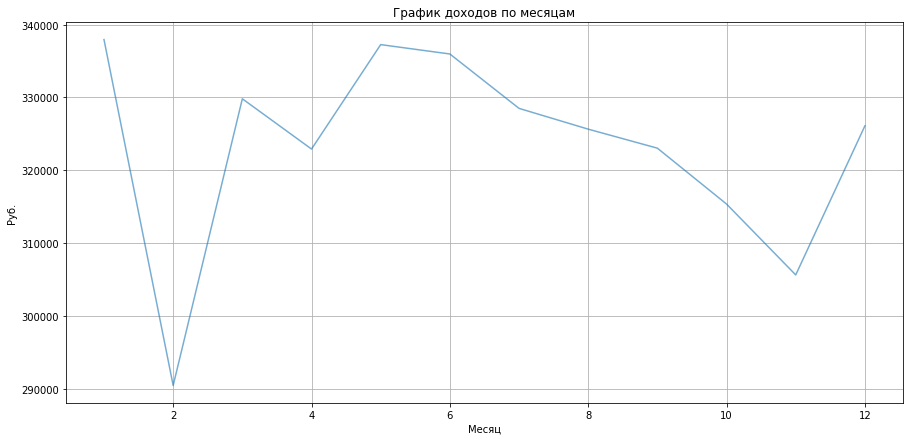

In [37]:
display(pivot_full_data.groupby('month').agg('sum'))
(
    pivot_full_data
    .groupby('month').agg('sum')
    .sort_values(by='month', ascending=False)
    .plot(y='cost', kind='line', figsize=(15, 7), legend=False, grid=True, alpha=0.6)
)
plt.title('График доходов по месяцам')
plt.ylabel('Руб.')
plt.xlabel('Месяц')
plt.show()

А всего за 2021 год было заработано:

In [38]:
pivot_full_data['cost'].sum()

3878641.0

**Вывод по шагу 5:**  поправить сумму и выводы
На этом этапе создали аггрегированный df pivot_full_data, который содержит суммарное расстояние, количество поездок, суммарное время и стоимость для каждого пользователя за каждый месяц. На основе этого df посторили график доходов GoFast по месяцам, похоже, в феврале желающих кататься меньше всего, а самый пик приходится на январь, май и декабрь. За 2021 год GoFast суммарно заработала ~~404,825,153~~ 3,878,641 рублей.

#### Шаг 6. Проверка гипотез

Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов.  

**6.1 Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.**  

Итак, **нулевая гипотеза** - средние значения времени пользователей из двух групп <u>равны</u>, <b>альтернативная гипотеза</b> - среднее значение времени пользователей с подпиской <u>больше</u>, чем среднее значение времени пользователей без подписки.  

Для иследования гипотезы используем генеральную совокупность, т.к. она достаточно мала для быстрой обработки. На основе генеральной совокупности построим гистограмму плотностей времени поездок у клиентов free и ultra. Т.к. показатель, который нужно оценить является непрерывной величиной, с изменением кол-ва "корзин" будет меняться её внешний вид.

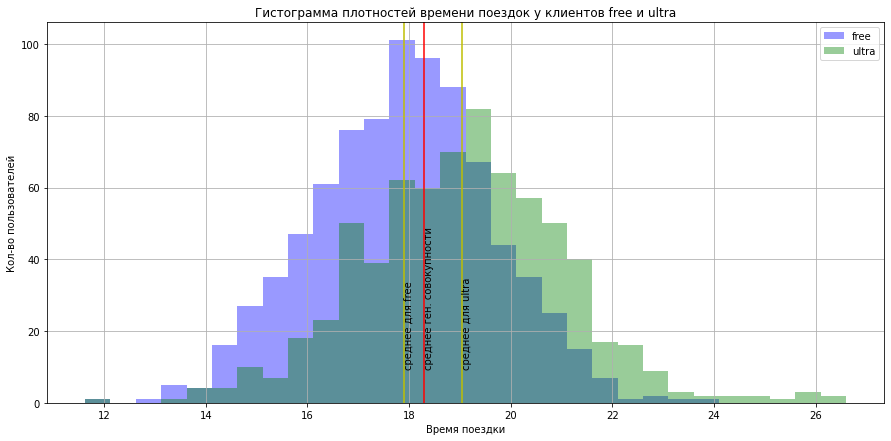

In [39]:
(
    full_data
    .pivot_table(index='user_id', columns='subscription_type', values='duration', aggfunc='mean')
    .plot(kind='hist', bins=30, figsize=(15, 7), legend=True, grid=True, alpha=0.4, color=['blue','green'], label=['Free', 'Ultra'])
)
plt.title('Гистограмма плотностей времени поездок у клиентов free и ultra')
plt.ylabel('Кол-во пользователей')
plt.xlabel('Время поездки')
plt.legend(loc = 'upper right')

general_mean = full_data['duration'].mean()
free_mean = full_data.query("subscription_type == 'free'")['duration'].mean()
ultra_mean = full_data.query("subscription_type == 'ultra'")['duration'].mean()

plt.axvline(x=general_mean, color='r') # среднее ген. совокупности
plt.text(general_mean, 10, 'среднее ген. совокупности', rotation=90)
plt.axvline(x=free_mean, color='y') # среднее для free
plt.text(free_mean, 10, 'среднее для free', rotation=90)
plt.axvline(x=ultra_mean, color='y') # среднее для ultra
plt.text(ultra_mean, 10, 'среднее для ultra', rotation=90)

plt.show()

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Отличнейший график, как раз подобное хотелось видеть выше. И подписи средних и разные цвета для тарифов, отлично

In [40]:
ultra_ride_time = full_data.query("subscription_type == 'ultra'")['duration']
free_ride_time = full_data.query("subscription_type == 'free'")['duration']

alpha = 0.05 # уровень статистической значимости

results = st.ttest_ind(ultra_ride_time, free_ride_time, alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 2.4959453720736625e-34
Отвергаем нулевую гипотезу


Из гистограммы точно видно, что пользователи с подпиской тратят больше времени на поездки, дополнительно проверили это статистическим методом, заключение которого в отвержении нулевой гипотезы в пользу того, что среднее значение времени пользователей с подпиской <u>больше</u>, чем среднее значение времени пользователей без подписки.  

**6.2 Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.**  

Сделаем, как и с прошлой гипотезой, наглядно и математически. Начнём с гипотез:  
<b>Нулевая гипотеза</b> - среднее расстояние, которое проезжают пользователи за 1 поездку **=** 3130 м  
<b>Альтернативная гипотеза</b> - среднее расстояние, которое проезжают пользователи за 1 поездку **<** 3130 м  

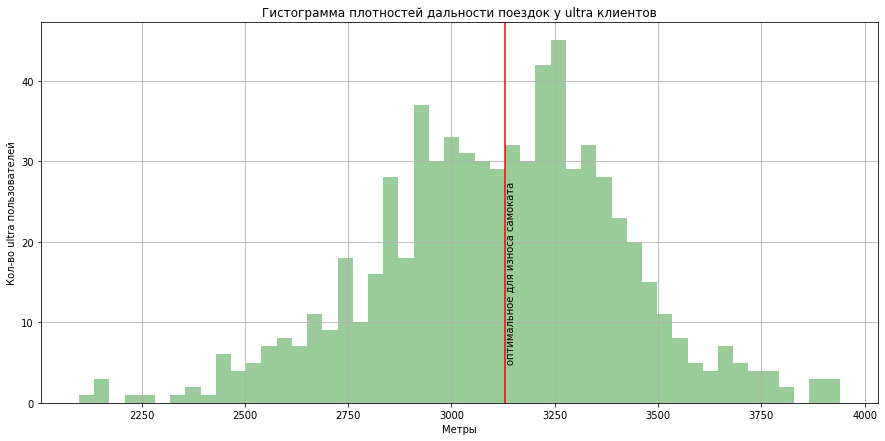

In [41]:
(
    full_data
    .query("subscription_type == 'ultra'")
    .pivot_table(index='user_id', values='distance', aggfunc='mean')
    .plot(kind='hist', bins=50, figsize=(15, 7), legend=False, grid=True, alpha=0.4, color='green')
)
plt.title('Гистограмма плотностей дальности поездок у ultra клиентов')
plt.ylabel('Кол-во ultra пользователей')
plt.xlabel('Метры')

plt.axvline(x=3130, color='r')
plt.text(3130, 5, 'оптимальное для износа самоката', rotation=90)

plt.show()

In [42]:
ultra_ride_distance = full_data.query("subscription_type == 'ultra'")['distance']

optimal_value = 3130 # оптимальное расстояние

alpha = .1 # уровень статистической значимости

results = st.ttest_1samp(
    ultra_ride_distance, 
    optimal_value,
    alternative='less')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.08046311521502146
Отвергаем нулевую гипотезу


Если смотреть по графику, то визуально оптимальное значение примерно по середине. Тут результат очень зависит от того, что примем за уровень стат. значимости, при 0.05 считаем, что пользователи проезжают 3130 м, а при значении > 0.08 считаем, что пользователи проезжают < 3130 м. В данном случае, я считаю, что лучше поставить высокий уровень стат. значимости, т.к. нулевая гипотеза говорит о равенстве, так я задам этому равенству более жёсткие рамки. Итого, верна альтернативная гипотеза - среднее расстояние, которое проезжают пользователи за 1 поездку < 3130 м.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
* Наиболее частые уровни 0.01, 0.05, зависит от того процента ошибок, которые кампания готова получать. 
* Здесь можно было бы выбрать альтернативную гипотезу - больше, так как именно этого больше всего боится бизнес, что поездки длиннее

<div class="alert alert-info">
<b>Нужна рекоммендация ревьюера:</b>
<br>
    Я не уверена, что верно выбрала уровень стат. значимости, т.к. решала это скорее интуитивно. Как это сделать правильно?
</div>

**6.3 Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.**  

Для начала визуализируем данные, а потом проверим математически. Гипотезы:  
<b>Нулевая гипотеза</b> - выручка от пользователей с подпиской по месяцам **такая же** как выручка от пользователей без подписки  
<b>Альтернативная гипотеза</b> - выручка от пользователей с подпиской по месяцам **выше**, чем выручка от пользователей без подписки    

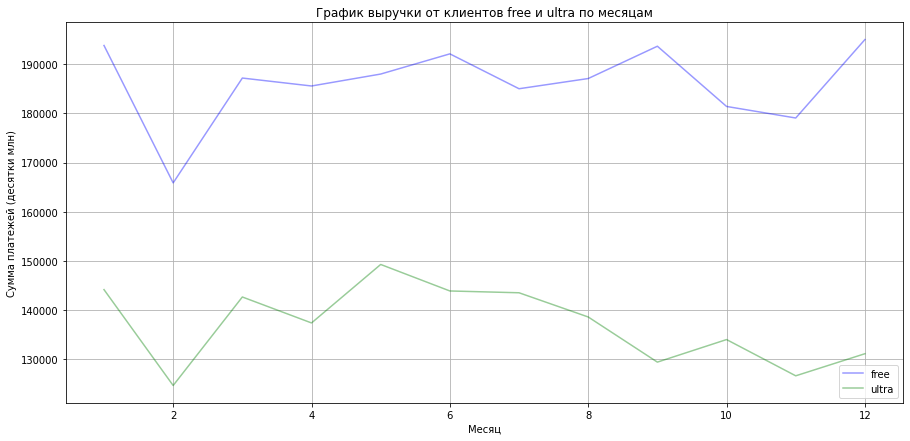

subscription_type,free,ultra
month,,
1,"193,850.00","144,108.00"
2,"165,856.00","124,572.00"
3,"187,214.00","142,608.00"
4,"185,598.00","137,318.00"
5,"188,030.00","149,235.00"
6,"192,144.00","143,834.00"
7,"185,038.00","143,466.00"
8,"187,116.00","138,534.00"
9,"193,700.00","129,337.00"


'Кол-во клиентов free: 6798, ultra: 4533'

In [43]:
(
    pivot_full_data
    .pivot_table(index='month', columns='subscription_type', values='cost', aggfunc='sum')
    .plot(kind='line', figsize=(15, 7), legend=True, grid=True, alpha=0.4, color=['blue','green'], label=['Free', 'Ultra'])
)
plt.title('График выручки от клиентов free и ultra по месяцам')
plt.ylabel('Сумма платежей (десятки млн)')
plt.xlabel('Месяц')
plt.legend(loc = 'lower right')
plt.show()

# Подробные данные
display(pivot_full_data.pivot_table(index='month', columns='subscription_type', values='cost', aggfunc='sum'))
free_count = pivot_full_data.query("subscription_type == 'free'")['user_id'].count()
ultra_count = pivot_full_data.query("subscription_type == 'ultra'")['user_id'].count()
display(f"Кол-во клиентов free: {free_count}, ultra: {ultra_count}")

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>☁️

* Всё же сравнение доходов по тарифам ожидалось по пользователям, месяцам, а не при агрегации всех доходом по месяцам. 
* Вывод поменяется</div>

<div class="alert alert-info"> <b>Комментарий студента V2:</b> Исправлено</div>


<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
   
Да, теперь правильно

</div>

А теперь с правильной агрегацией:

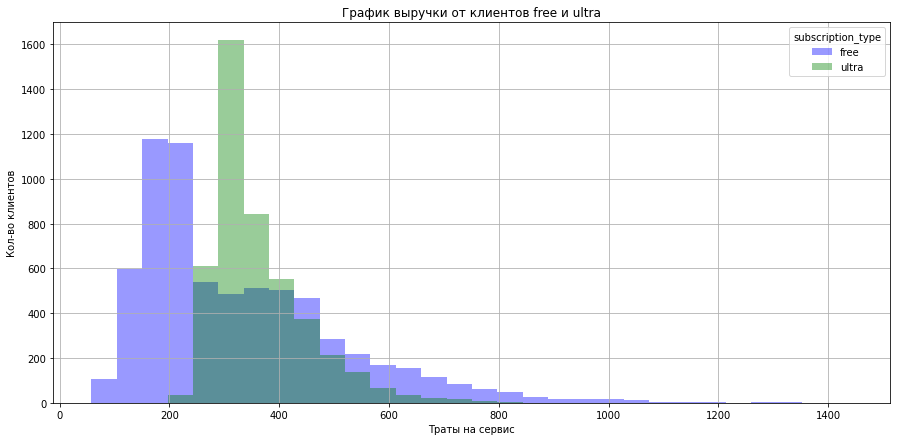

In [61]:
(
    pivot_full_data
    .pivot_table(index=['user_id', 'month'], columns='subscription_type', values='cost', aggfunc='sum')
    .plot(kind='hist', bins=30, figsize=(15, 7), legend=True, grid=True, alpha=0.4, color=['blue','green'], label=['Free', 'Ultra'])
)
plt.title(f'График выручки от клиентов free и ultra')
plt.ylabel('Кол-во клиентов')
plt.xlabel('Траты на сервис')
plt.show()

In [65]:
ultra_cost = pivot_full_data.query("subscription_type == 'ultra'").pivot_table(index=['user_id', 'month'], values='cost', aggfunc='sum')
free_cost  = pivot_full_data.query("subscription_type == 'free'").pivot_table(index=['user_id', 'month'], values='cost', aggfunc='sum')

alpha = 0.05 # уровень статистической значимости

results = st.ttest_ind(ultra_cost, free_cost, alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: [1.88503944e-31]
Отвергаем нулевую гипотезу


p-значение настолько мало, что можно сказать, что выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки, хотя при общей агрегации так и не выглядит.

**6.4 Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?**  

Я бы составила две гипотезы:  
<b>Нулевая гипотеза</b> - кол-во обращений от пользователей осталось прежним   
<b>Альтернативная гипотеза</b> - кол-во обращений от пользователей осталось стало ниже, чем до обновления

Т.к. есть слово "значимо" в постановке вопроса, уровень статистической значимости нужно установить поменьше, чтобы только при значительном отклонении мы считали, что значение изменилось, а не осталось равным. Если описать решением, оно выглядело бы примерно так:

In [49]:
# data = pd.read_csv('/datasets/data.csv') # предполагаемый файл с данными  
# count_before = data.query("flag == 'before'")['count'] # берём информацию о кол-вах обращений до обновления  
# count_after = data.query("flag == 'after'")['count'] # и после обновления  
  
# alpha = 0.05 # устанавливаем низкий уровень статистической значимости  

# # ttest_rel применяется для проверки гипотез о равенстве для зависимых выборок  
# results = st.ttest_rel(count_after, count_before, alternative='less')
  
# print('p-значение:', results.pvalue) # смотрим полученное p-value  
  
# if results.pvalue < alpha: # и получаем результат  
#     print('Отвергаем нулевую гипотезу')  
# else:  
#     print('Не получилось отвергнуть нулевую гипотезу')  

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Говоришь о зависимости гипотез, односторонней альтернативной - отлично!

Если p-value в результате проверки оказалось бы < уровня стат. значимости, значит, количество обращений в тех. поддержку действительно значимо сократилось. Если бы p-value было ооочень близко к 1.0, то стоило бы проверить, а не увеличилось ли количество обращений после обновления.

**Вывод по шагу 6:**  
Было проверено 4 гипотезы, результаты:  
1. Пользователи с подпиской тратят больше времени на поездки, чем пользователи без неё.
2. Среднее расстояние, которое проезжают пользователи за 1 поездку < 3130 м.
3. Выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.
4. Описан алгоритм, по которому (при наличии данных) можно провести оценку изменения кол-ва обращений в тех. поддержку.

# Шаг 7. Распределения*

**7.1 Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж.**  

Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 
10 % пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %. Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.  

Итак, показатели, которые есть:  
- вероятность продления после бесплатного периода = 0.1
- вероятность привлечь **менее 100 клиентов** после пробного периода **должна оказаться** ~5%

Нужно экспериментально выяснить, при каком кол-ве разосланных промокодов, мы с вероятностью ~95% получим платежи от 100 и более клиентов.

Решим задачу через кумулятивную функцию распределения. Метод cdf() получает на вход один аргумент и возвращает вероятность, что случайная величина примет значение, меньшее заданного аргумента. 

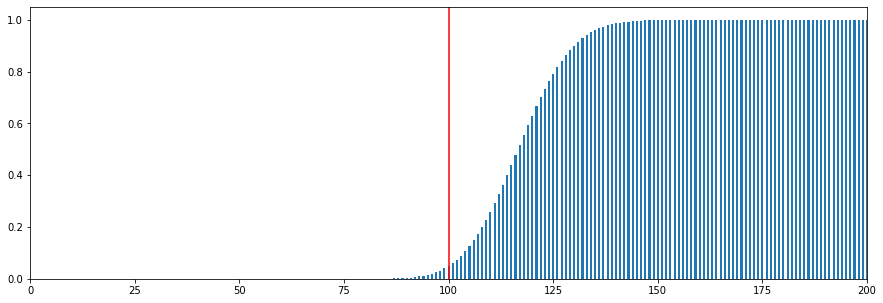

'Вероятность не выполнить план ~ 0.04955'

In [50]:
n = 1172 # экспериментально выявляем
p = 0.1 # вероятность успеха

distr = []

for k in range(0, n + 1):
    current_value = binom.cdf(k, n, p)
    distr.append(current_value)
    
plt.figure(figsize=(15, 5))
plt.xlim([0, 200]) 
plt.bar(range(0, n + 1), distr, width = 0.5)
plt.axvline(x=100, color='r')
plt.show()

f"Вероятность не выполнить план ~ {round(binom.cdf(100, n, p), 5)}"

V1 ~~В данном эксперименте я остановилась на 1300 промокодах (если это число увеличивать, вероятность привлечь менее 100 клиентов, кончено, снижается). Красной линией для наглядности отмечены 100 клиентов, вероятность, получить меньше 100 клиентов = сумма вероятностей столбцов левее черты, визуально она =~5%, а значит, 1300 разосланных промокодов обеспечат приток 100 и более клиентов с вероятностью 95%.~~  

V2  
В данном эксперименте я остановилась на 1172 промокодах (если это число увеличивать, вероятность привлечь менее 100 клиентов, кончено, снижается). Красной линией для наглядности отмечены 100 клиентов, вероятность, получить меньше 100 клиентов = сумма вероятностей столбцов левее черты, доп. информация под графиком отображает вероятность в точке 100 по x, она =~5%, а значит, 1172 разосланных промокодов обеспечат приток 100 и более клиентов с вероятностью ~ 95%.


<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>⛅️ 

Как получено 1300, меньшего числа промокодов не будет достаточно?
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Получено очень на глаз) <br>Добавила вывод точной вероятности при конкретном значении, оптимальное кол-во изменилось в меньшую сторону </div>
<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
   
Да, всё супер!) Единственное `cdf` считает вероятность от 100 включительно, поэтому надо было бы считать от 99

</div>

**7.2 Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.**  

V1 ~~Работаем большим кол-вом, поэтому переведём единицы измерения в тысячи, таким образом n будет равно не 1 млн. уведомлений, а 1000 тыс. (что тоже = 1 млн.). В остальном действуем как и с предыдущим распределением:~~

In [51]:
# V1
# n = 1000 # кол-во уведомлений (тыс)
# p = 0.4 # вероятность успеха

# distr = []

# for k in range(0, n + 1):
#     current_value = binom.cdf(k, n, p)
#     distr.append(current_value)
    
# plt.figure(figsize=(15, 5))
# # plt.xlim([300, 500]) 
# plt.bar(range(0, n + 1), distr, width = 0.5)
# plt.axvline(x=399.5, color='r')
# plt.show()

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>⛅️ 

* Какова вероятность то?
* Можешь дополнительно вывести одинаковы ли вероятности при миллионе уведомлений, 1000 тысяч, 100)    
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Поняла, в чём дело, вероятности не одинаковы, старое пометиа как V1, зачеркнула/закомментировала, новое под тегом V2</div>


V1  ~~Красной линией отмечена интересующая нас отметка в 399.5 тыс пользователей, визуально её пройдёт только 50%, это и есть вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.~~

Получим вероятность того, что уведомление откроют не более 399,5 тыс. пользователей:

In [52]:
binom.cdf(399500, 1000000, 0.4)

0.1539584359564276

In [53]:
# и вот почему нельзя изменить единицы и получить тот же результат как я думала в V1
binom.cdf(399.5, 1000, 0.4)

0.4879850394856607

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
   
Спасибо за проверку! 

</div>

<div class="alert alert-info"> <b>Вопрос студента V2:</b> Нужна помощь с построением графика, на большом n умирает ядро и график не строится до конца, не понимаю, как это поправить?</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
   

Ниже вывел пример построения и прошу прощения выше не прокомментировал график, его нужно поправить, график строится на основе `cdf`, а ожидалось `pmf`, так как `cdf` считает вероятность получить значение столько и ниже, а `pmf`, вероятность исключительно этого значения 
</div>

Построим график с помощью аппроксимации:

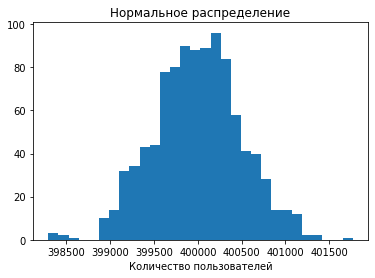

In [54]:
# Код ревьюера

n = 1000000
p = 0.4

mu = n * p
sigma = np.sqrt(n * p * (1 - p))
s = np.random.normal(mu, sigma, 1000)

distr = st.norm(mu, sigma)

plt.hist(s, 30)
plt.title('Нормальное распределение')
plt.xlabel('Количество пользователей');


Уведомление откроют не более 399,5 тыс. пользователей с вероятностью 0.1539584359564276.

**Вывод по шагу 7:**  
Составили два распределения для проверки вероятностей, получили результаты:  
- 1172 разосланных промокодов обеспечат приток 100 и более клиентов с вероятностью ~ 95%
- уведомление откроют не более 399,5 тыс. пользователей с вероятностью 15,4%

# Общий вывод

На момент исследования у GoFast 1,5 тысячи клиентов, совершивших ~18 тысяч поездок и два возможных тарифа. Что удивительно, данные были в очень хорошем состоянии, изначально без пропусков (дальше неявных пропусков тоже обнаружено не было), и всего 31 дубликат (это 1.9% от изначального df, незначительное изменение объёма выборки). Поправила тип данных для date в users_data (object -> datetime), добавила столбец month в users_data.  

Итого, размер df-ов, с которыми работали дальше:  
- rides_data: 18068 -> 18068 (без изменений)
- users_data: 1565 -> 1534 (минус 31 запись, это 1.9% от изначального users_data)  

На этапе исследовательского анализа данных выяснили:  
- GoFast предоставляет аренду самокатов в 8 городах.
- Самый активный по кол-ву клиентов - Пятигорск (219 человек), наименее активный - Москва (168 человек) (между ними разрыв ~23).
- Если смотреть по всем городам, то доля клиентов с подпиской 46%, почти половина. От города к городу соотношение немного меняется, но средняя картина сохраняется, только в Москве и Омске клиентов с подпиской немного больше, чем без.
- Средний возраст клиентов от 20 до 30 лет, средний: 24.9, медианный: 25.0.
- Практически равномерное распределение по месяцам наблюдается как в дальности, так и в продолжительности поездок. В среднем самокат за поездку проезжает чуть больше 3 км и делает он это почти за 18 минут.


Дальше все df-ы объединили в один df full_data, содеращий полный набор данных по каждой поездке, пользователю, который её совершил и его тарифном плане. При дальнейшем исследовании он будет являться "базовым".  
 

Посмотрели в разрезе типов тарифов клиентов на дальность и продолжительность поездок, итоговая сводка выглядит так:
- Все пользователи арендую самокат примерно на 3 км, разница между дальностью поездок у двух категорий пользователей ~1%
- "Ultra пользователи" катаются на пол минуты дольше (~18 мин), "free пользователи" ~17.5 мин, это отличие в ~5%  

И посмотрели на распределение:
- Клиенты с подпиской чаще всего совершают поездки, близкие к медиане их сегмента, график распределения имеет чёткий пик, тогда как пользователи без подписки сильнее разбросаны от своей медианы, этот пик более пологий, у них больше поездок, которые по дальности больше и меньше, чем клиентов с подпиской.
- Если в случае с дальностью поездки, free клиенты "окружили" ultra клиентов, то тут медиана ultra клиентов на секунды впереди медианы free клиентов, т.е. ultra клиенты чаще совершают более продолжительные поездки.

Создали аггрегированный df pivot_full_data, который содержит суммарное расстояние, количество поездок, суммарное время и стоимость для каждого пользователя за каждый месяц. На основе этого df посторили график доходов GoFast по месяцам, похоже, в феврале желающих кататься меньше всего, а самый пик приходится на январь, май и декабрь. За 2021 год GoFast суммарно заработала 3,878,641 рублей.

Было проверено 4 гипотезы, результаты:  
1. Пользователи с подпиской тратят больше времени на поездки, чем пользователи без неё.
2. Среднее расстояние, которое проезжают пользователи за 1 поездку < 3130 м.
3. Выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.
4. Описан алгоритм, по которому (при наличии данных) можно провести оценку изменения кол-ва обращений в тех. поддержку.

Составили два распределения для проверки вероятностей, получили результаты:  
- 1172 разосланных промокодов обеспечат приток 100 и более клиентов с вероятностью ~ 95%
- уведомление откроют не более 399,5 тыс. пользователей с вероятностью 15,4%

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Отличный вывод, нравятся дополнительные деления маркированным, нумерованными списками, молодец! Пару аспектов нужно обсудить, желаю лёгкости с правками в стат гипотезах и расчёте доходов</div>
    
 <div class="alert alert-info"> <b>Комментарий студента:</b> Поправила все комментарии красные, кроме одного, нужно более подробное пояснение и нужен совет, как поступить с отрисовкой графика в 7 шаге, 2 пункте. Эти два момента отметила как "Вопрос студента V2"</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
   
Помог с этими двумя аспектами, принимаю и желаю успехов далее!)

</div>

**Итоговые рекомендации**  

Один пользователь с подпиской приносит больше денег сервису, чем один пользователь без неё. В долях, все пользователи без подписки приносят больше, чем все пользователи с подпиской. Стоит подумать, как замотивировать пользователей покупать подписку. Возможно, можно как-то поиграть с промокодами и акциями.  

Чем больше промокодов будет у клиентов, тем больше вероятность того, что клиенты будут лояльнее относиться к покупкам у сервиса. Нужно только осторожно обращаться с промокодами, которые сразу что-то предоставляют бесплатно, т.к. клиенты могут решить, что такие акции щедрости так регулярно происходят, что выгоднее не покупать ничего дополнительного, а просто дождаться промокодов. В таком случае, процент вероятности, что клиент что-то купит после получения промокода снизится, а он и так составляет 10%. Можно подумать о бонусных программах, чем больше пользователь является нашим клиентом, тем больше ему доступно плюшек.